# Parallel processing

There is possibility to generate usecases profiles at the appliance level using parallel processing.


For example to generate 365 profiles using a parallel process in shell use the `-p` option



The following cells provide you with a way to use the parallel process in a pure python code

In [8]:
from ramp import UseCase

import numpy as np
import random
import math
import pandas as pd
from ramp.core.utils import calc_time_taken, get_day_type
from ramp import User, UseCase
from ramp.post_process import post_process as pp


use_case = UseCase(date_start="2022-01-01", date_end="2022-01-09", peak_enlarge=0.15)
household = User(
    user_name="Household",
    num_users=10,
)
indoor_bulb = household.add_appliance(
    name="Indoor Light Bulb",
    number=6,
    power=7,
    num_windows=2,
    func_time=120,
    time_fraction_random_variability=0.2,
    func_cycle=10,
    window_1=[1170, 1440],  # from 19:30 to 24:00
    window_2=[0, 30],  # from 24 to 00:30
    random_var_w=0.35,
)

use_case.add_user(household)

You will simulate 9 days from 2022-01-01 00:00:00 until 2022-01-09 00:00:00


## Run usecase without parallel processing

Day 1 / 9 completed
Day 2 / 9 completed
Day 3 / 9 completed
Day 4 / 9 completed
Day 5 / 9 completed
Day 6 / 9 completed
Day 7 / 9 completed
Day 8 / 9 completed
Day 9 / 9 completed


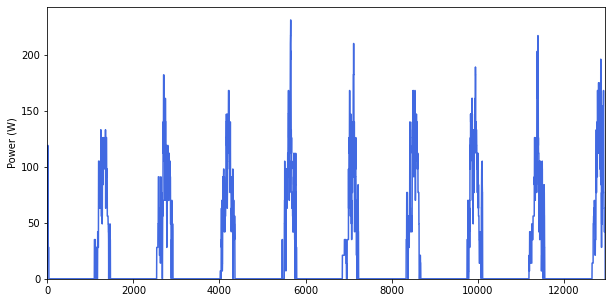

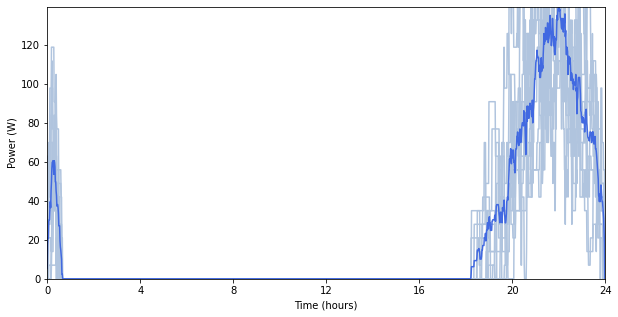

In [9]:
daily_profiles = use_case.generate_daily_load_profiles(flat=False, verbose=True)

# Post-processes the results and generates plots
Profiles_avg, Profiles_list_kW, Profiles_series = pp.Profile_formatting(daily_profiles)
pp.Profile_series_plot(Profiles_series)  # by default, profiles are plotted as a series

if (
    len(daily_profiles) > 1
):  # if more than one daily profile is generated, also cloud plots are shown
    pp.Profile_cloud_plot(daily_profiles, Profiles_avg)

## Run usecase with parallel processing

Explicitely calling the parallel method

Computing appliances profiles: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 2202.89unit/s]


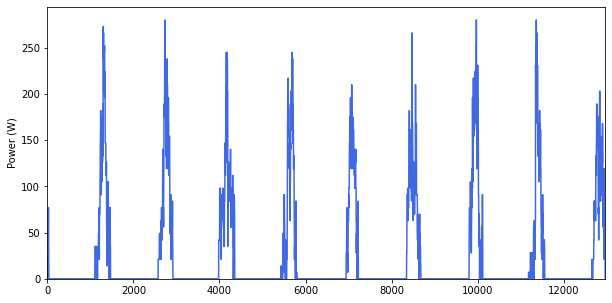

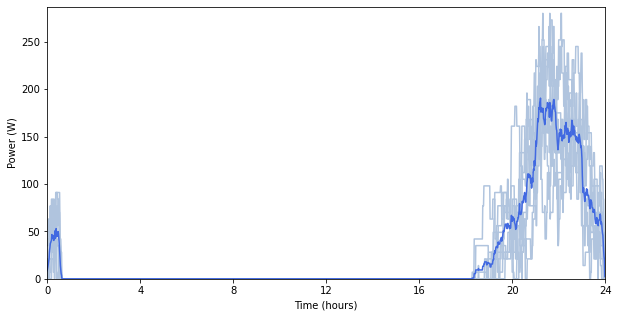

In [4]:
Profiles_list = use_case.generate_daily_load_profiles_parallel(flat=False)

# Post-processes the results and generates plots
Profiles_avg, Profiles_list_kW, Profiles_series = pp.Profile_formatting(Profiles_list)
pp.Profile_series_plot(Profiles_series)  # by default, profiles are plotted as a series

if (
    len(Profiles_list) > 1
):  # if more than one daily profile is generated, also cloud plots are shown
    pp.Profile_cloud_plot(Profiles_list, Profiles_avg)

You can also set the `parallel_processing` attribute of the `UseCase` instance to `True` and use the `generate_daily_load_profiles`

Computing appliances profiles: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 2548.58unit/s]


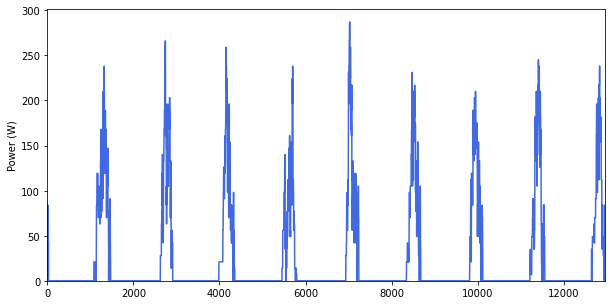

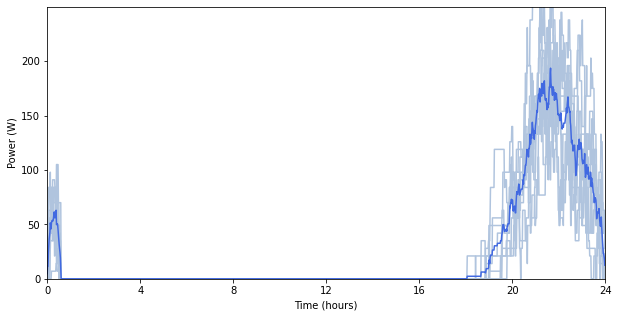

In [6]:
use_case.parallel_processing = True

Profiles_list = use_case.generate_daily_load_profiles(flat=False)

# Post-processes the results and generates plots
Profiles_avg, Profiles_list_kW, Profiles_series = pp.Profile_formatting(Profiles_list)
pp.Profile_series_plot(Profiles_series)  # by default, profiles are plotted as a series

if (
    len(Profiles_list) > 1
):  # if more than one daily profile is generated, also cloud plots are shown
    pp.Profile_cloud_plot(Profiles_list, Profiles_avg)